 # Importing libraries  

In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import math as math
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
from scipy import stats
from scipy.stats import norm, skew

# Import Train and Test Datasets

In [91]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<center><u><strong> Primary exploration </strong></u></center>

In [92]:
#the numbers of samples and features (datasets dimensions)
print("The train dataset size : {} ".format(train.shape))
print("The test dataset size  : {} ".format(test.shape))

The train dataset size : (1460, 81) 
The test dataset size  : (1459, 80) 


<p>      </p> 
<p>      </p>
<p>      </p>

<center><u><strong>Idea about missing values in both datasets  </strong></u></center>

In [93]:
# Summary of missing values in  Train dataset
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
train_missing = pd.DataFrame({'Missing Ratio' :train_na})
train_missing.head(20)

,Missing Ratio
PoolQC,99.521
MiscFeature,96.301
Alley,93.767
Fence,80.753
FireplaceQu,47.260
LotFrontage,17.740
GarageYrBlt,5.548
GarageType,5.548
GarageFinish,5.548
GarageQual,5.548


In [94]:
# Summary of missing values in  Test dataset
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
test_missing = pd.DataFrame({'Missing Ratio' :test_na})
test_missing.head(20)

,Missing Ratio
PoolQC,99.794
MiscFeature,96.504
Alley,92.666
Fence,80.123
FireplaceQu,50.034
LotFrontage,15.559
GarageYrBlt,5.346
GarageCond,5.346
GarageQual,5.346
GarageFinish,5.346


<p>      </p> 
<p>      </p>
<p>      </p>


# Dealing with the outliers 

<center><u><strong> handling the outliers  </strong></u></center>

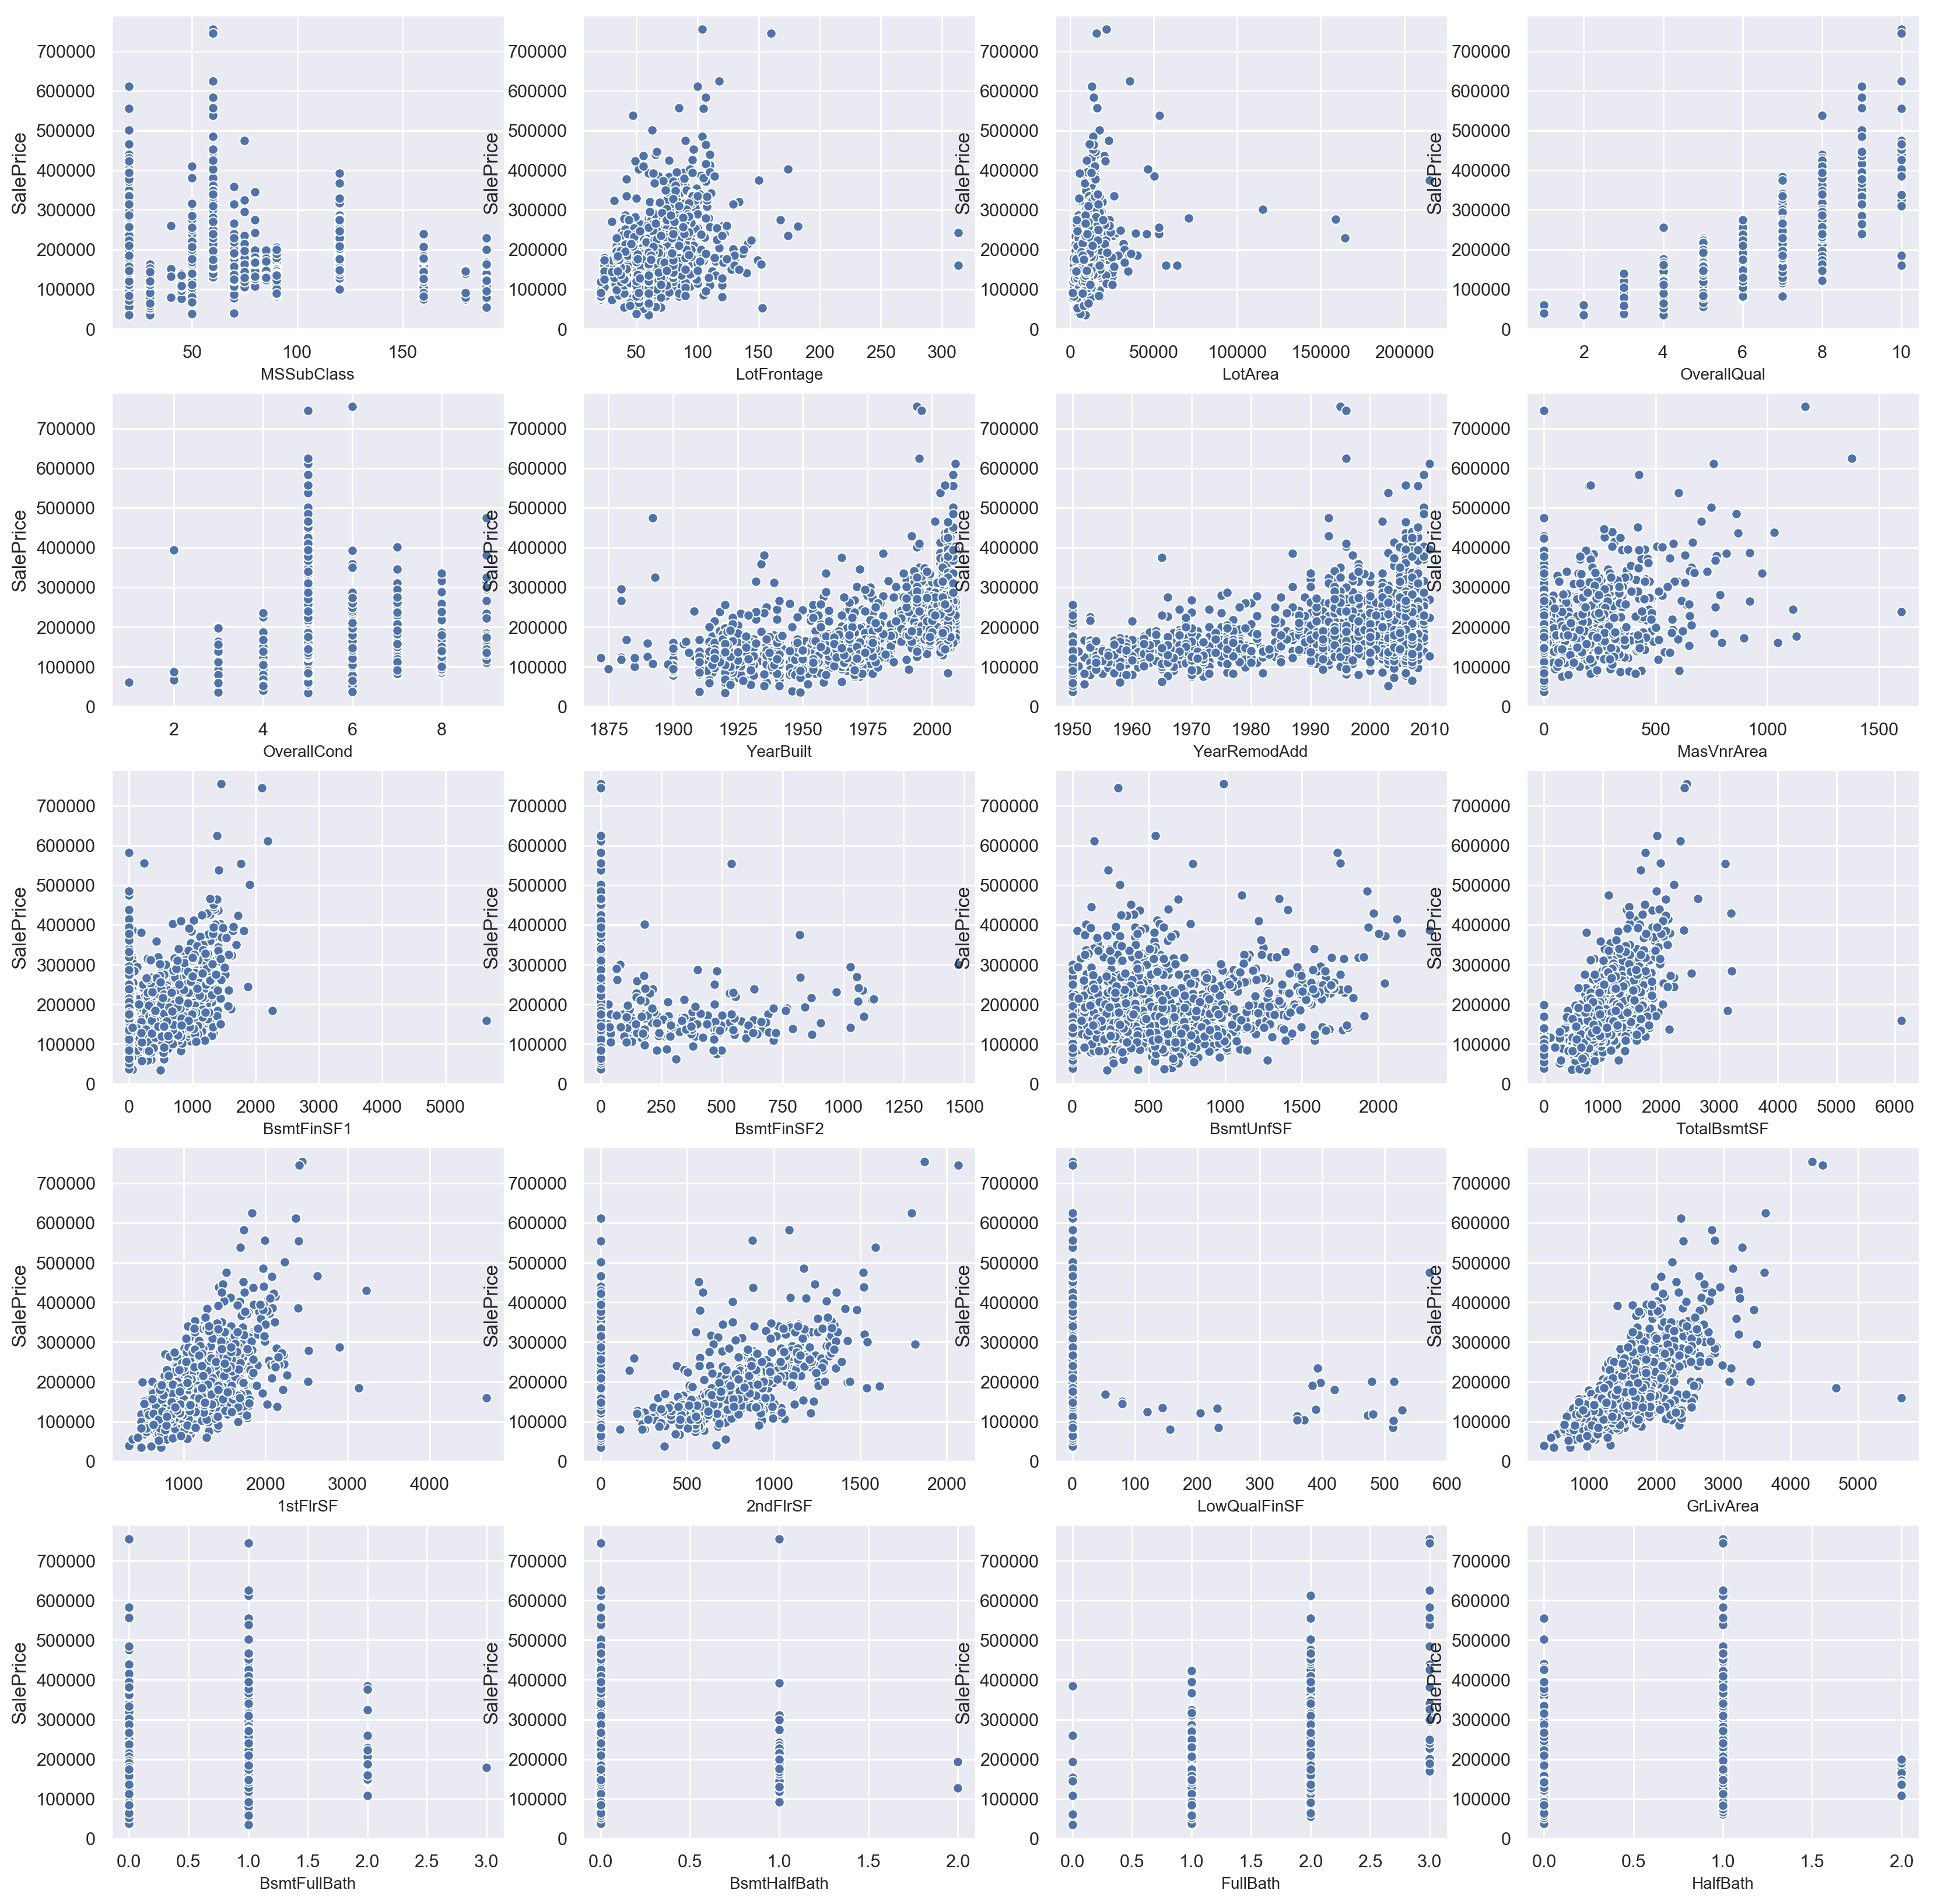

In [95]:
# Scatter plots (y = SalePrice, x=first 21 numeric variables)
num_tr1 = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 0:21]
m = len(num_tr1.columns)
fig = plt.figure(dpi = 200, figsize = (20, 25))
for i in range(1, m):
    col = num_tr1.iloc[:, i]
    ax = fig.add_subplot(math.ceil(m / 4), 4, i)
    ax.plot = sns.scatterplot(x = num_tr1.columns[i] , y = 'SalePrice', data = train) 
    plt.xlabel(num_tr1.columns[i], fontsize = 10)
    plt.ylabel("SalePrice")

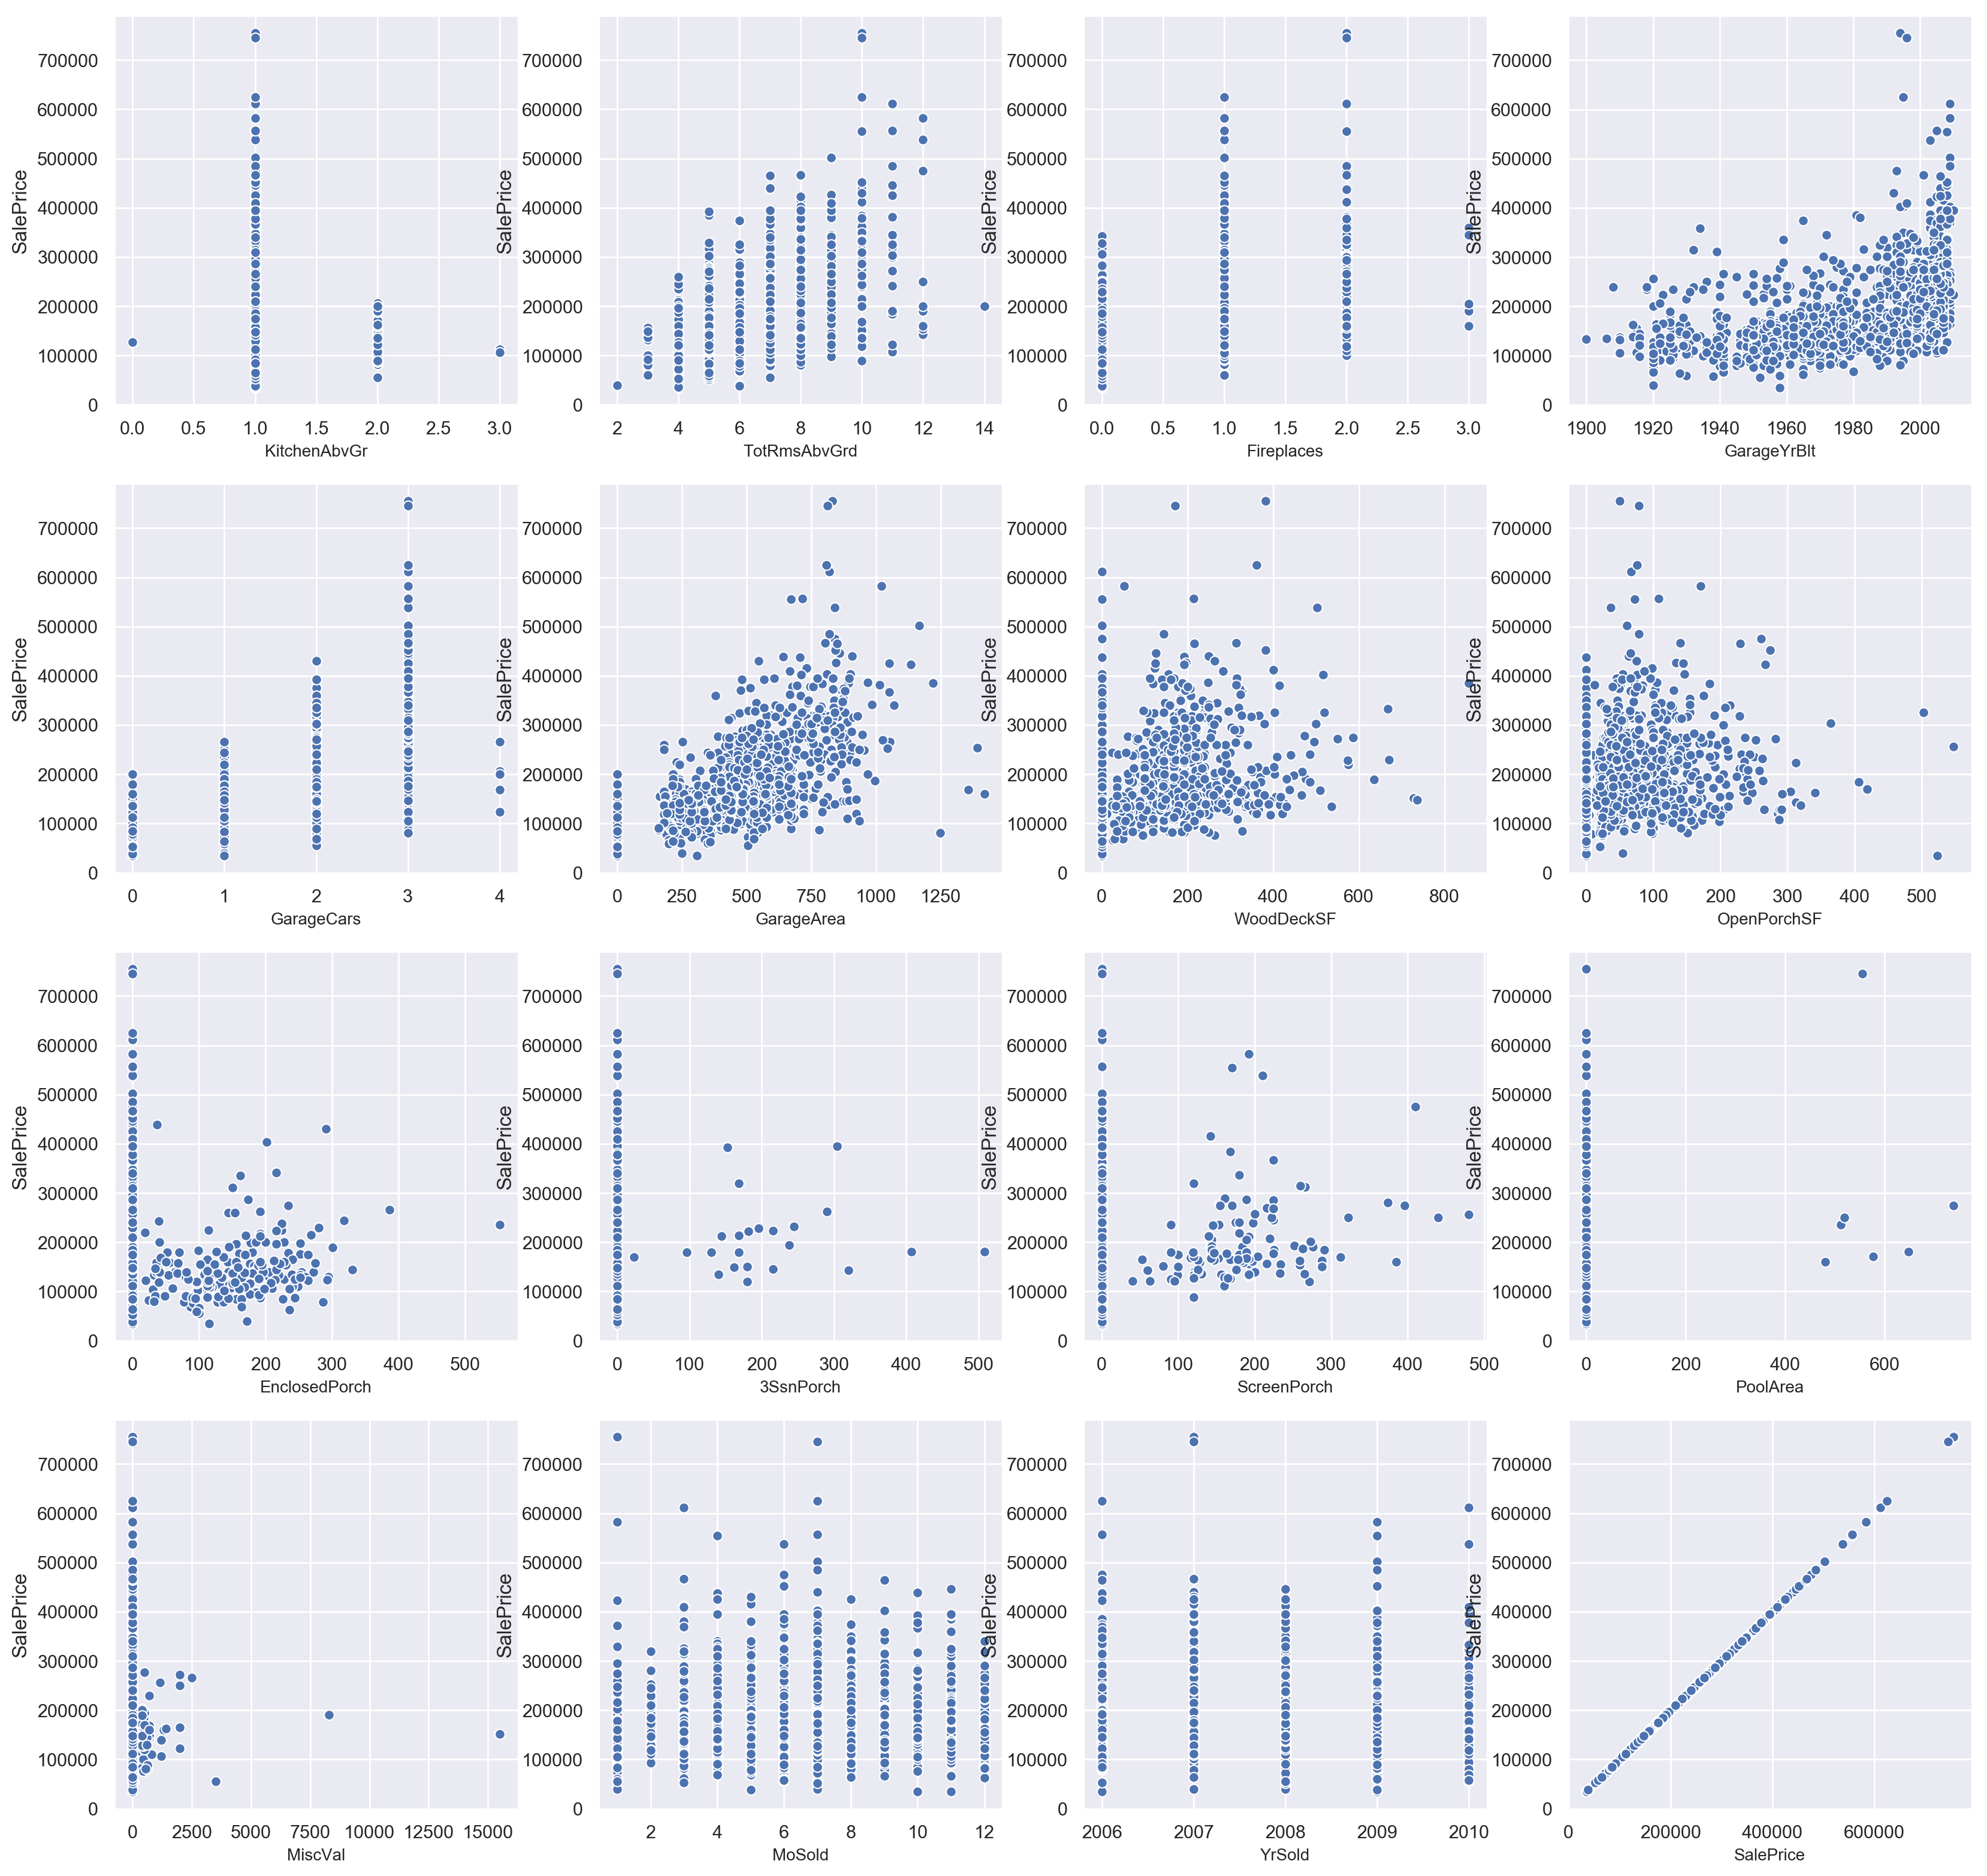

In [96]:
# Scatter plots (continue)
num_tr2 = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 21:]
m = len(num_tr2.columns)
fig = plt.figure(dpi = 200, figsize = (20, 25))
for i in range(1, m):
    col = num_tr2.iloc[:, i]
    ax = fig.add_subplot(math.ceil(m / 4), 4, i)
    ax.plot = sns.scatterplot(x = num_tr2.columns[i] , y = 'SalePrice', data = train) 
    plt.xlabel(num_tr2.columns[i], fontsize = 10)
    plt.ylabel("SalePrice")

 we notice some strange datapoints in some scatterplots, such as : 
 - (y=salesprice,x=LotFrontage): 2 data points with average sale price and the maximum Lotfrontage  >300.
 - (y=salesprice,x=LotArea): 1 data point with  average sale price and LotArea > 200000.
 - (y=salesprice,x=Overallcond): 1 data point with 2 in the overall condition and a high sale price .
 - (y=salesprice,x=BsmFinSF1), (y=salesprice,x=1stFlrSF), (y=salesprice,x=TotalBsmtSF) :1 data point with an average price and a strange value of BsmtFinSF1 , 1stFlrSF and TotalBsmtSF.
 - (y=salesprice,x=GrLivArea): 2 datapoints , average SalePrice and GrLivArea > 4500.
 - (y=salesprice,x=OpenPorchSF): 1 datapoint with a minimum saleprice and a high Open porch area.
 

<center><u><strong> Removing the outliers  </strong></u></center>

In [99]:
train.drop(train[train['LotFrontage']>300].index,inplace = True)
train.drop(train[train['LotArea']>100000].index,inplace = True)
train.drop(train[train['BsmtFinSF1']>5000].index,inplace = True)
train.drop(train[train['TotalBsmtSF']>5000].index,inplace = True)
train.drop(train[train['1stFlrSF']>4000].index,inplace = True)
train.drop(train[train['GrLivArea']>4500].index,inplace = True)
train.drop(train[(train['OpenPorchSF']>505) & (train['SalePrice']<100000)].index,inplace = True)
train.drop(train[(train['OverallCond']==2) & (train['SalePrice']>300000)].index,inplace = True)
train.shape


(1451, 81)

# The skewness of the target variable

<center><u><strong> Cheking the skewness the target variable   </strong></u></center>


 mu = 180527.85 and sigma = 79074.29



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


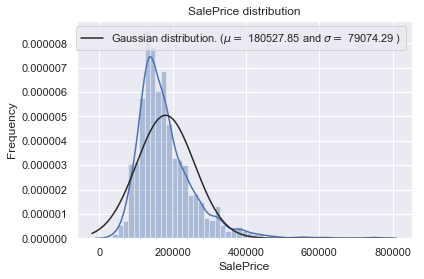

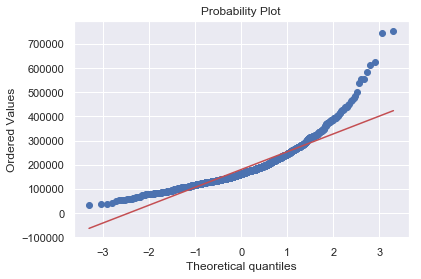

In [100]:
#The distribution of the target variable 
sns.distplot(train['SalePrice'] , fit=norm);
#the fitted parameters ( mean , and standard deviation )
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#the gaussian distribution using the fitted parameters
plt.legend(['Gaussian distribution. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the Quantile-Quantile plot
figure = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<center><u><strong>Normalize the target variable   </strong></u></center>


 mu = 12.02 and sigma = 0.40



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


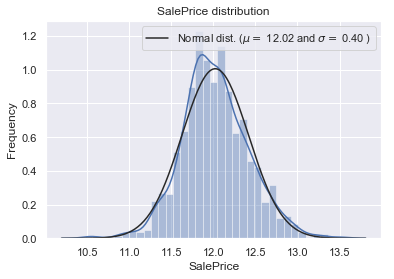

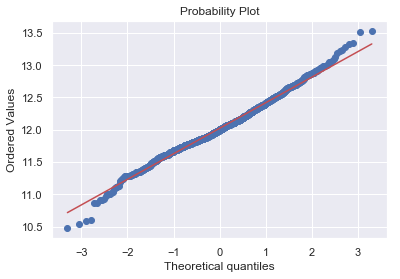

In [101]:
#Using the log(1+'SalePrice') to normalize the values of the target price
train["SalePrice"] = np.log1p(train["SalePrice"])
#the new distribution of the target variable
sns.distplot(train['SalePrice'] , fit=norm);
#the fitted parameters ( mean , and standard deviation )
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#the gaussian distribution using the fitted parameters
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
#Get also the Quantile-Quantile plot
figure = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Missing values

<center><u><strong> Combining datasets   </strong></u></center>

In [102]:
#Saving the 'Id' column (this feature is unrelevent for predictions , however we need it to submit the results)
train_Id = train['Id']
test_Id = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("after dropping Id column is : {} ".format(train.shape)) 
print("after dropping Id column is : {} ".format(test.shape))

after dropping Id column is : (1451, 80) 
after dropping Id column is : (1459, 79) 


In [152]:
#feature engineering
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2910, 79)


In [153]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.460
Alley,93.196
Fence,80.412
FireplaceQu,48.763
LotFrontage,16.598
GarageQual,5.430
GarageCond,5.430
GarageFinish,5.430
GarageYrBlt,5.430


Text(0.5,1,'Percent missing data by feature')

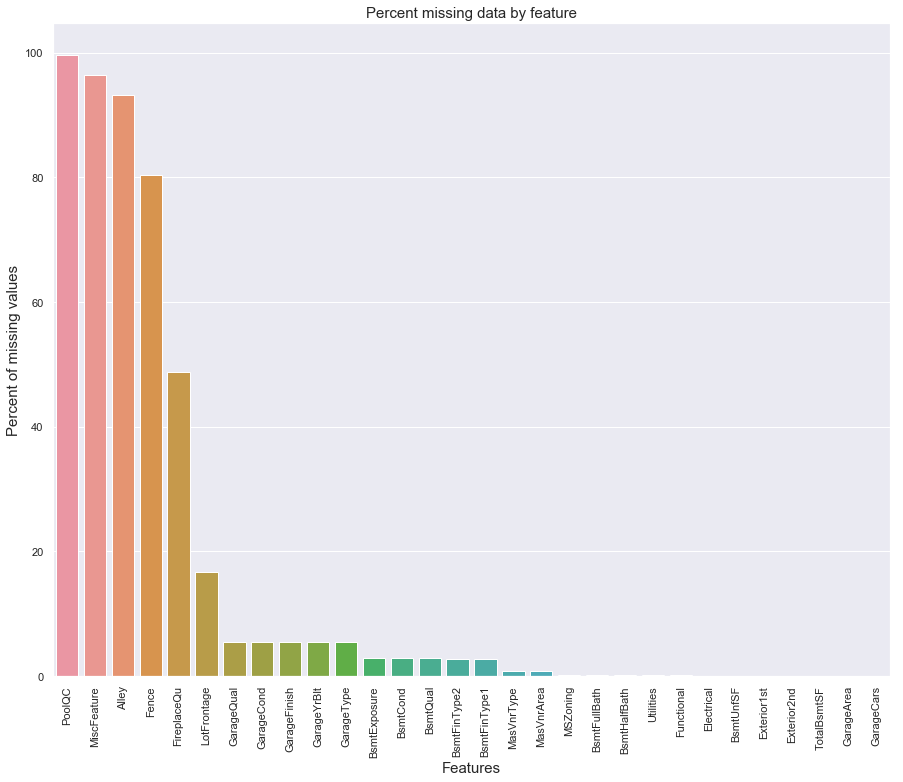

In [154]:
#missing values percentage visualization
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<center><u><strong> Correlation   </strong></u></center>

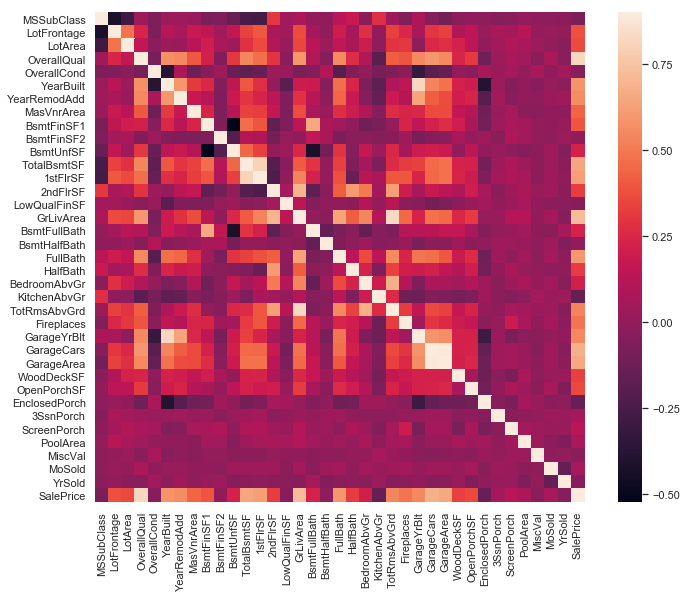

In [155]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

<center><u><strong> Imput missing values   </strong></u></center>

In [156]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [157]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')


In [158]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [159]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [160]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [161]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [162]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])


In [163]:
all_data = all_data.drop(['Utilities'], axis=1)


In [164]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [165]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


In [166]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


In [167]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [168]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")



In [169]:
#No missing values left
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [170]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

<center><u><strong> Label encoding  </strong></u></center>

In [171]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2910, 78)


In [172]:
# adding a variable ( if a house has a basement and two floors , so we use the product to express the intersection of the three)
all_data['TotalSF'] = all_data['TotalBsmtSF']*all_data['1stFlrSF']*all_data['2ndFlrSF']

<center><u><strong> Cheking the skewness of the other numeric features  </strong></u></center>

In [173]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.936
PoolArea,17.667
LowQualFinSF,12.070
3SsnPorch,11.358
TotalSF,5.289
LandSlope,4.975
KitchenAbvGr,4.295
BsmtFinSF2,4.157
EnclosedPorch,4.002
ScreenPorch,3.940


<center><u><strong> Normalize the numeric skewed features  </strong></u></center>

In [174]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [175]:
#Transform to dummy variables
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2910, 220)


In [176]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# building the models 

In [179]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

<center><u><strong> Cross validation  </strong></u></center>

In [180]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

<center><u><strong> 6 algorithms to build the final model  </strong></u></center>

- Lasso regression
- ElasticNet regression
- Ridge regression
- Gradient boosting
- XGBoost
- light gbm

In [182]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


<center><u><strong> Evaluating each model (the scores)  </strong></u></center>

In [183]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1143 (0.0077)



In [184]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1142 (0.0077)



In [185]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1502 (0.0044)



In [186]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1154 (0.0073)



In [187]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1165 (0.0058)



In [188]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1139 (0.0064)



<center><u><strong> Try the stacking of the models </strong></u></center>

In [191]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
   
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
   
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

<center><u><strong> The new score using the average of the models </strong></u></center>

In [194]:
averaged_models = AveragingModels(models = (ENet, GBoost,  lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1094 (0.0078)



In [196]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

<center><u><strong> the new score using the stacking of the models  </strong></u></center>

In [197]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, model_xgb),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1082 (0.0072)


<center><u><strong> Ensembling   </strong></u></center>

In [199]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [200]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07608130257404297


In [201]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08171369727858979


In [202]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07226589558752616


<center><u><strong> Combining the stacking model and the xgboost model and the light gbm model  </strong></u></center>

In [203]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07485630042281786


<center><u><strong> The final model </strong></u></center>

In [204]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [206]:
#Submissions
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [208]:
# ranked 435 in KAGGLE (Rachid)